# Data Processing

<ol style="font-size: 20px; line-height: 30px; ">
    <li> Dataset loading: images and masks. </li>
    <li> 
        Dataset split: 
        <ul> 
            <li> Training dataset </li>
            <li> Validation dataset </li>
            <li> Testing dataset </li>
        </ul>
    </li>
    <li> Save the dataset </li>
</ol>

## Import

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split

## Dataset loading: images and masks

In [ ]:
def load_dataset(path):
    images = sorted(glob(os.path.join(path, "images", "*")))
    masks = sorted(glob(os.path.join(path, "masks", "*")))
    return images, masks

## Dataset split

In [ ]:
def split_dataset(images, masks, split=0.1):
    split_size = int(len(images) * split)
    
    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)
    
    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)
    
    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

## Saving the dataset

### Creating a folder

In [ ]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
def save_dataset(images, masks, save_path):
    for x, y in tqdm(zip(images, masks), total=len(images)):
        """ Extract the name """
        name = x.split("/")[-1]

        """ Reading the image and mask """
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)

        """ Saving the image and mask """
        save_image_path = os.path.join(save_path, "images", name)
        save_mask_path = os.path.join(save_path, "masks", name)
        
        cv2.imwrite(save_image_path, x)
        cv2.imwrite(save_mask_path, y)

## Executing the program

### Loading dataset: Brain Tumor Dataset


In [ ]:
dataset_path = "brain_tumor_dataset"

In [ ]:
images, masks = load_dataset(dataset_path)
print(f"Images: {len(images)} - Masks: {len(masks)}")

Images: 3064 - Masks: 3064


### Visualize the images and masks

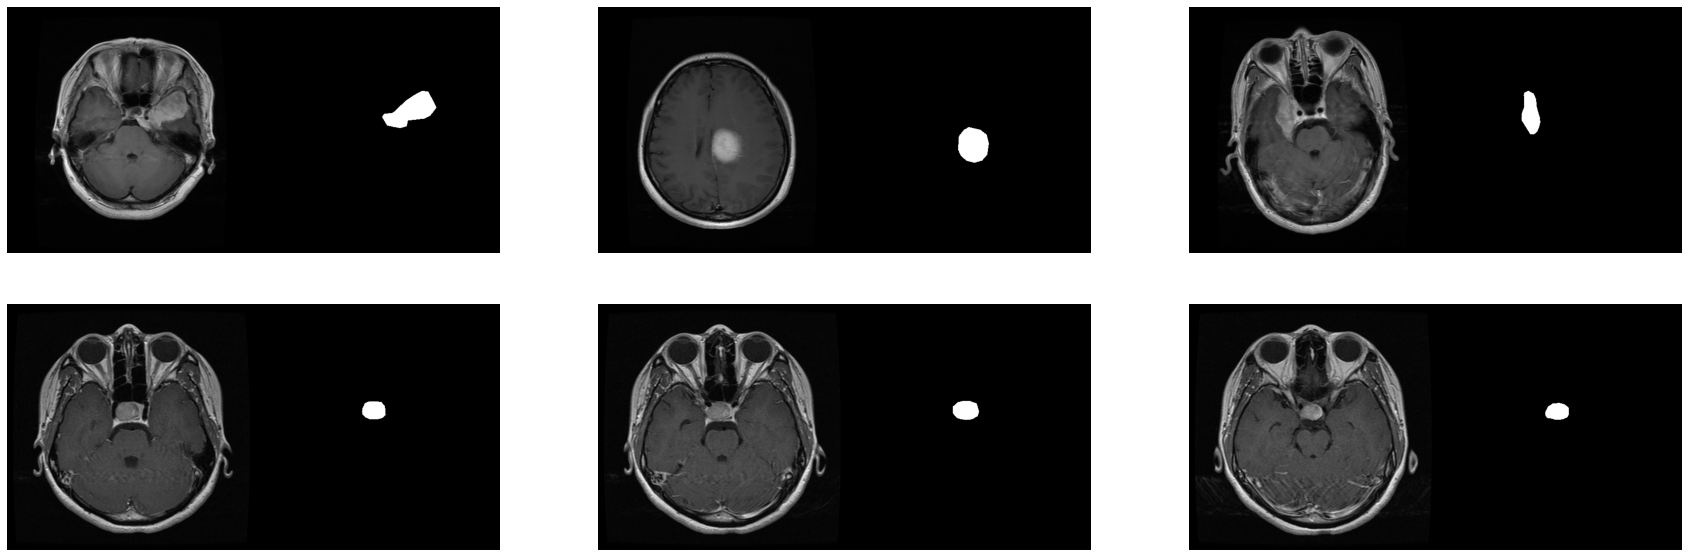

In [37]:
from imshowtools import imshow

cat = []
for x, y in zip(images[:6], masks[:6]):
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    y = cv2.imread(y, cv2.IMREAD_COLOR)
    z = np.concatenate([x, y], axis=1)
    cat.append(z)
    
imshow(*cat, size=(30, 10), columns=3)  

### Dataset split

In [39]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = split_dataset(images, masks, split=0.1)

In [40]:
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Test : {len(test_x)} - {len(test_y)}")

Train: 2452 - 2452
Valid: 306 - 306
Test : 306 - 306


### Saving the dataset
##### 1. Creating the folders

In [41]:
save_dir = "dataset"
for item in ["train", "valid", "test"]:
    create_dir(os.path.join(save_dir, item, "images"))
    create_dir(os.path.join(save_dir, item, "masks"))

#### 2. Saving the training datset

In [42]:
save_dataset(train_x, train_y, os.path.join(save_dir, "train"))

100%|█████████████████████████████████████████████████████████████████████████████| 2452/2452 [00:10<00:00, 235.80it/s]


#### 3. Saving the validation dataset

In [43]:
save_dataset(valid_x, valid_y, os.path.join(save_dir, "valid"))

100%|███████████████████████████████████████████████████████████████████████████████| 306/306 [00:01<00:00, 236.35it/s]


#### 4. Saving the testing dataset

In [44]:
save_dataset(test_x, test_y, os.path.join(save_dir, "test"))

100%|███████████████████████████████████████████████████████████████████████████████| 306/306 [00:01<00:00, 240.36it/s]
